<a href="https://colab.research.google.com/github/mgarbanzo/goes-r_datajam_2023/blob/main/DataJam_SUVI_Part_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

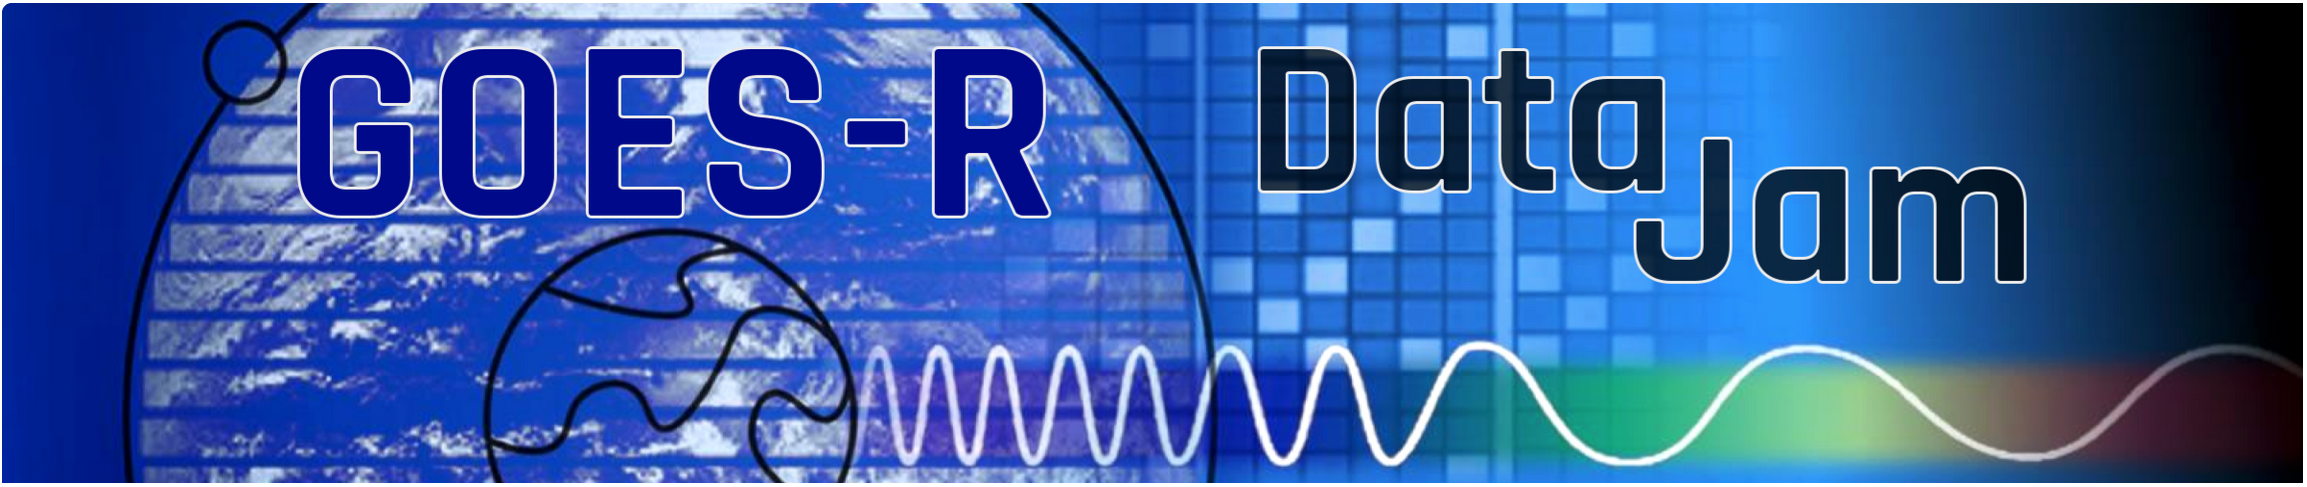

Diego Souza, Engineer, INPE (Brasil)

Dr. Marcial Garbanzo-Salas, Professor, UCR (Costa Rica)

# How much does the Sun changes with time?

## Data Download

For this part we will need a base time and 3 subsequent times.

Base Time: Year 2023, Day 246, Time 18:00 (can you find them in the file name below)?

There are three more files corresponding to 12 minutes after the base time, 1 hour after the base time and 1 day after the base time.

Lets get the following files:

In [ ]:
!wget https://noaa-goes16.s3.amazonaws.com/SUVI-L1b-Fe171/2023/246/18/OR_SUVI-L1b-Fe171_G16_s20232461800112_e20232461800122_c20232461800325.nc
!wget https://noaa-goes16.s3.amazonaws.com/SUVI-L1b-Fe171/2023/246/18/OR_SUVI-L1b-Fe171_G16_s20232461812113_e20232461812123_c20232461812321.nc
!wget https://noaa-goes16.s3.amazonaws.com/SUVI-L1b-Fe171/2023/246/19/OR_SUVI-L1b-Fe171_G16_s20232461900114_e20232461900124_c20232461900319.nc
!wget https://noaa-goes16.s3.amazonaws.com/SUVI-L1b-Fe171/2023/247/18/OR_SUVI-L1b-Fe171_G16_s20232471800147_e20232471800157_c20232471800364.nc

--2023-09-09 21:52:00--  https://noaa-goes16.s3.amazonaws.com/SUVI-L1b-Fe171/2023/246/18/OR_SUVI-L1b-Fe171_G16_s20232461800112_e20232461800122_c20232461800325.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 3.5.25.220, 16.182.64.209, 54.231.226.145, ...
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|3.5.25.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4991105 (4.8M) [binary/octet-stream]
Saving to: ‘OR_SUVI-L1b-Fe171_G16_s20232461800112_e20232461800122_c20232461800325.nc’

OR_SUVI-L1b-Fe171_G 100%[===================>]   4.76M  27.3MB/s    in 0.2s    

2023-09-09 21:52:00 (27.3 MB/s) - ‘OR_SUVI-L1b-Fe171_G16_s20232461800112_e20232461800122_c20232461800325.nc’ saved [4991105/4991105]

--2023-09-09 21:52:00--  https://noaa-goes16.s3.amazonaws.com/SUVI-L1b-Fe171/2023/246/18/OR_SUVI-L1b-Fe171_G16_s20232461812113_e20232461812123_c20232461812321.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.ama

We still need the libraries to read the data in this notebook:

In [ ]:
!pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.4 MB/s eta 0:00:00


Load the library and create the link to the files using Dataset

In [ ]:
import netCDF4 as nc
file_0 = nc.Dataset("/content/OR_SUVI-L1b-Fe171_G16_s20232461800112_e20232461800122_c20232461800325.nc")
file_12m = nc.Dataset("/content/OR_SUVI-L1b-Fe171_G16_s20232461812113_e20232461812123_c20232461812321.nc")
file_1h = nc.Dataset("/content/OR_SUVI-L1b-Fe171_G16_s20232461900114_e20232461900124_c20232461900319.nc")
file_1d = nc.Dataset("/content/OR_SUVI-L1b-Fe171_G16_s20232471800147_e20232471800157_c20232471800364.nc")

We will not look at the metadata, you already know how to do it from the first part of the tutorial.

## Extract data and plotting

We will get the data from all four files and then compare it.

In [ ]:
data0 = file_0.variables['RAD'][:]
data12m = file_12m.variables['RAD'][:]
data1h = file_1h.variables['RAD'][:]
data1d = file_1d.variables['RAD'][:]

Now we load the Pylab library to plot, and the Numpy library.

In [ ]:
import pylab as plt
import numpy as np

Lets plot the difference between the base time and the data from 12 minutes after that time.

There are some minor changes in the code! Take it slow!

It is important to understand what we are looking at!

What is the meaning of red?

What is the meaning of blue?

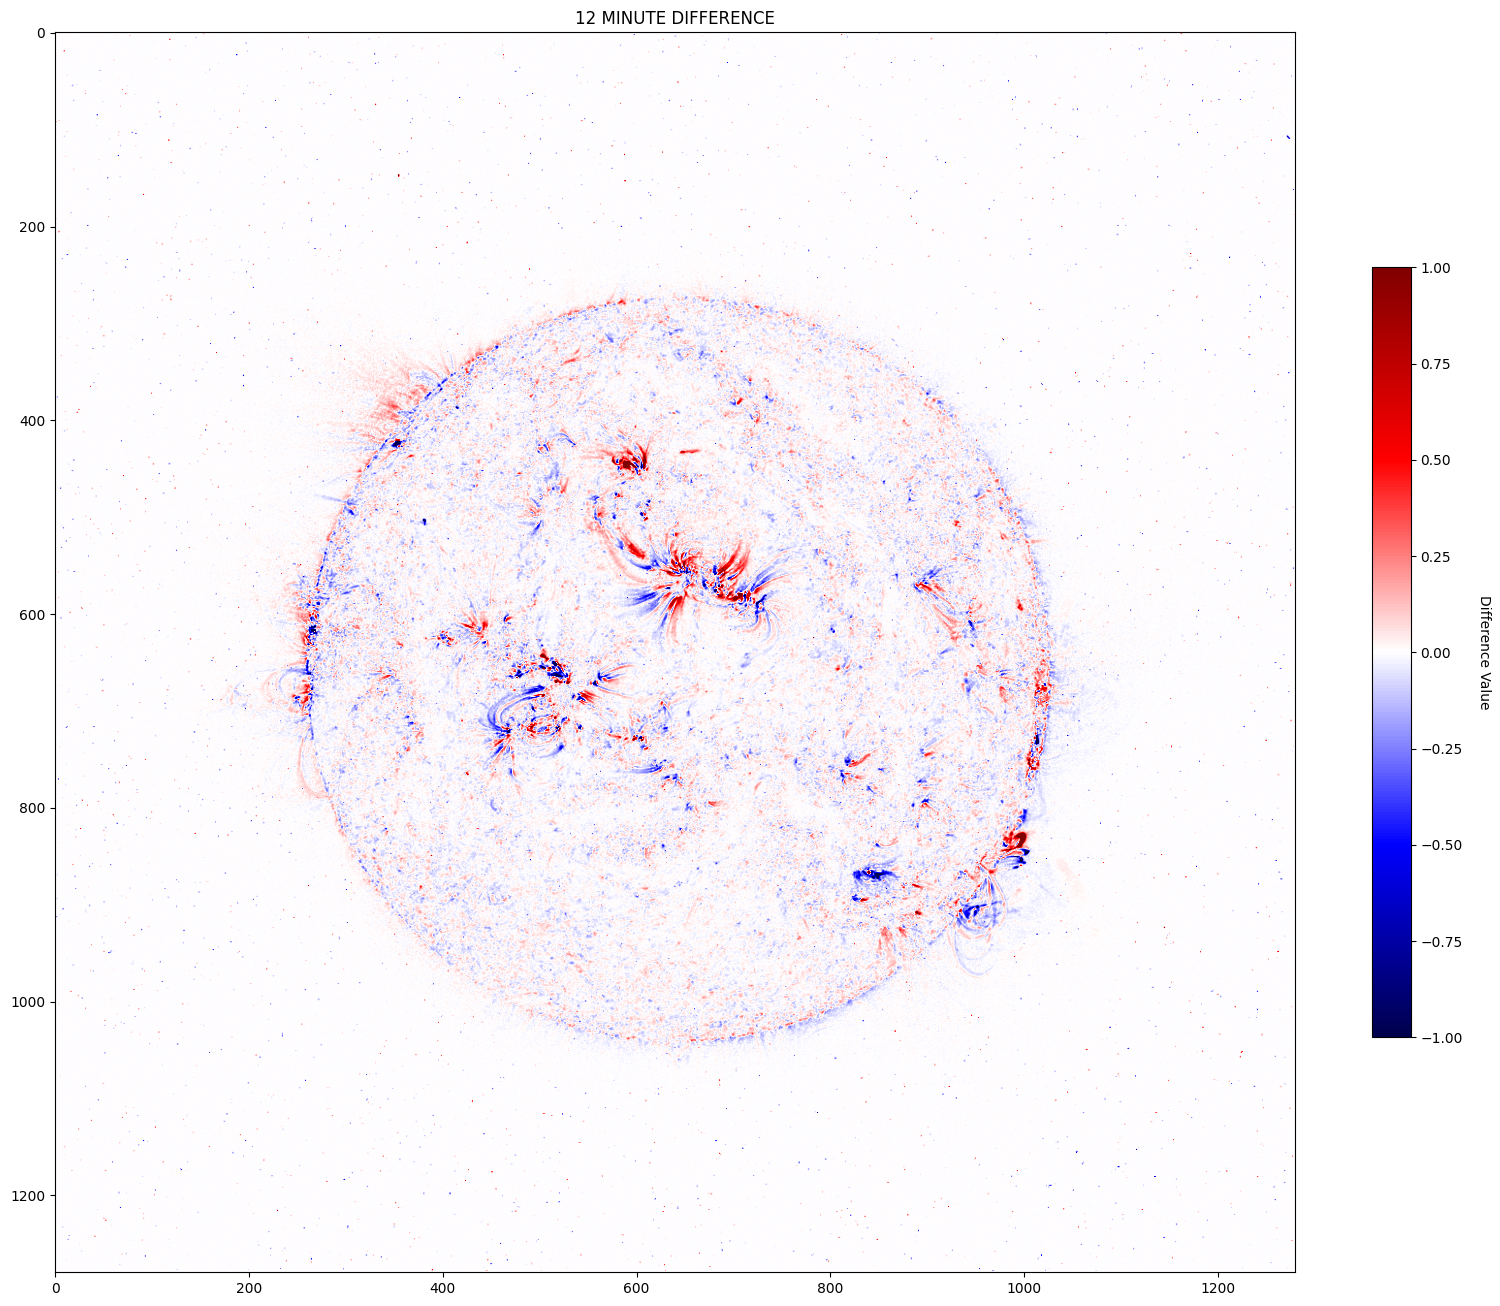

In [ ]:
plt.figure(figsize=(20,20))
im = plt.imshow(data12m-data0, cmap='seismic', vmin=-1, vmax=1)
plt.title("12 MINUTE DIFFERENCE")
cbar = plt.colorbar(im, shrink=0.5)
cbar.set_label('Difference Value', rotation=270, labelpad=20)

## Challenge!

Add a code cell and modify the previous one to create the 1 hour and 1 day difference products!

---

Solution:

Below are the code snippets for plotting the differences over durations of 1 hour and 1 day:

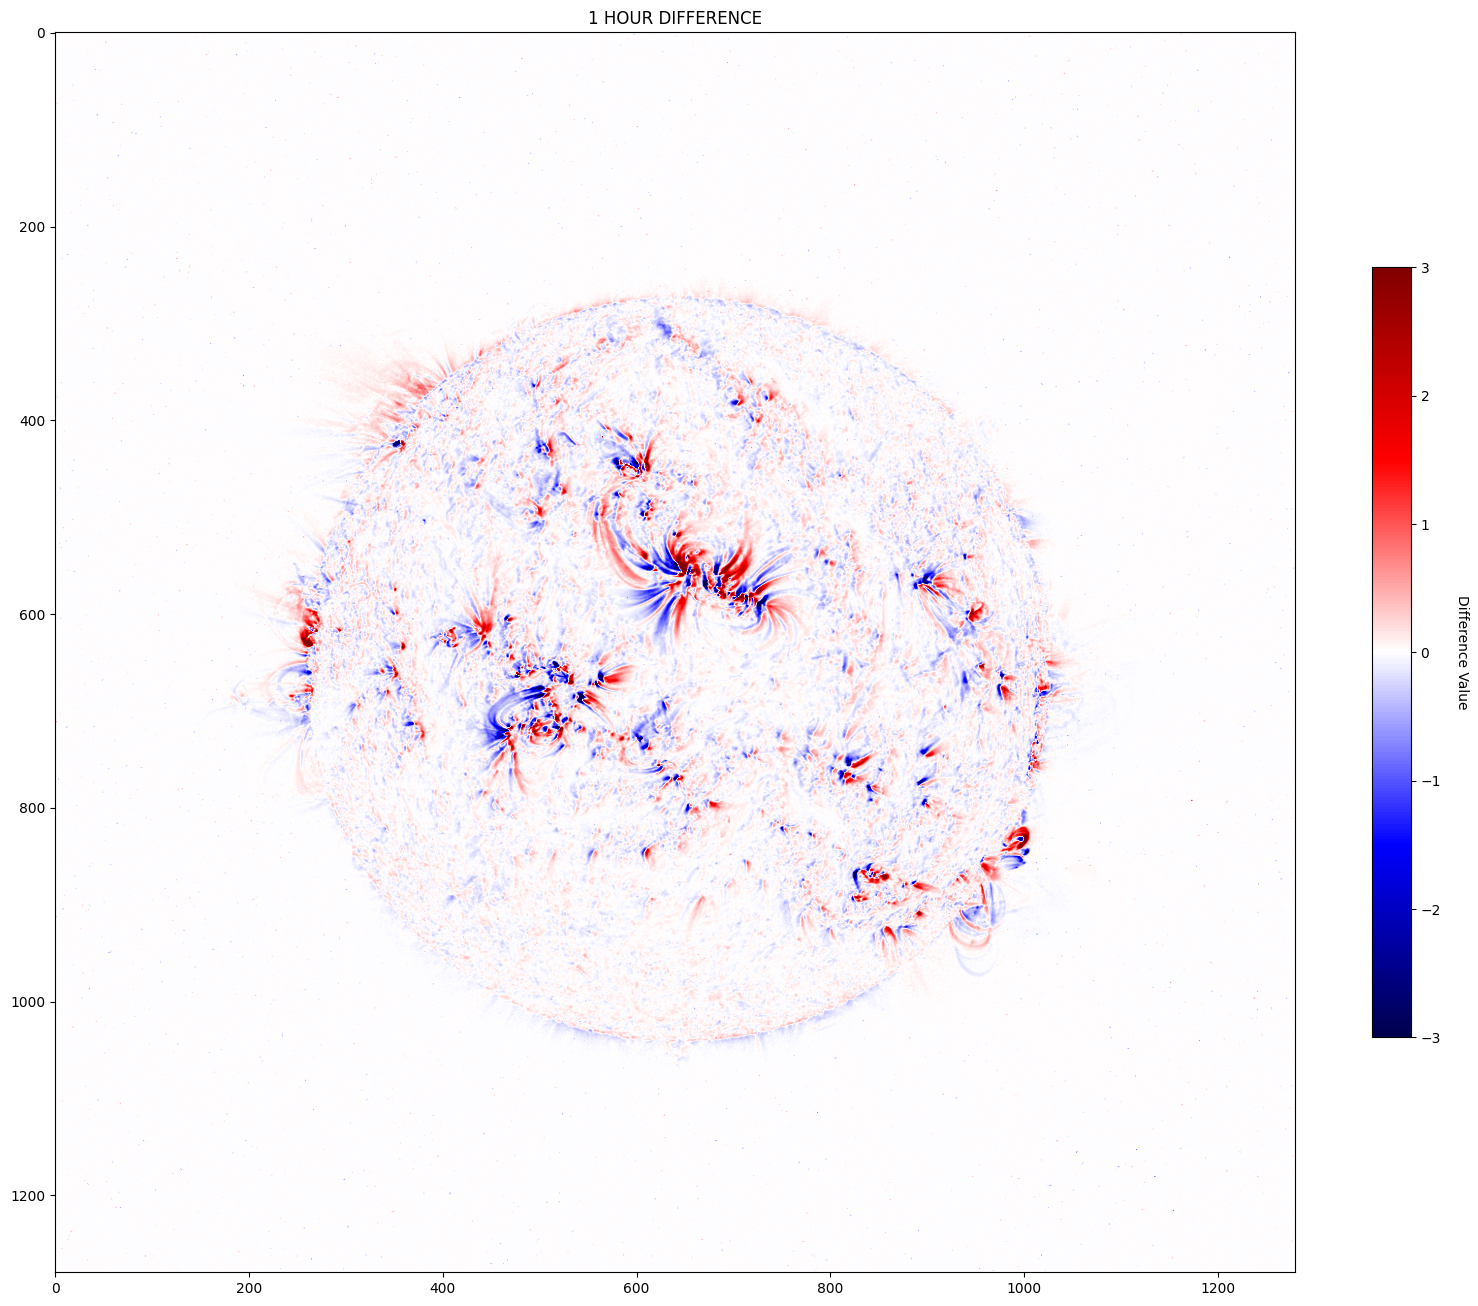

In [ ]:
plt.figure(figsize=(20,20))
im = plt.imshow(data1h-data0, cmap='seismic', vmin=-3, vmax=3)
plt.title("1 HOUR DIFFERENCE")
cbar = plt.colorbar(im, shrink=0.5)
cbar.set_label('Difference Value', rotation=270, labelpad=20)

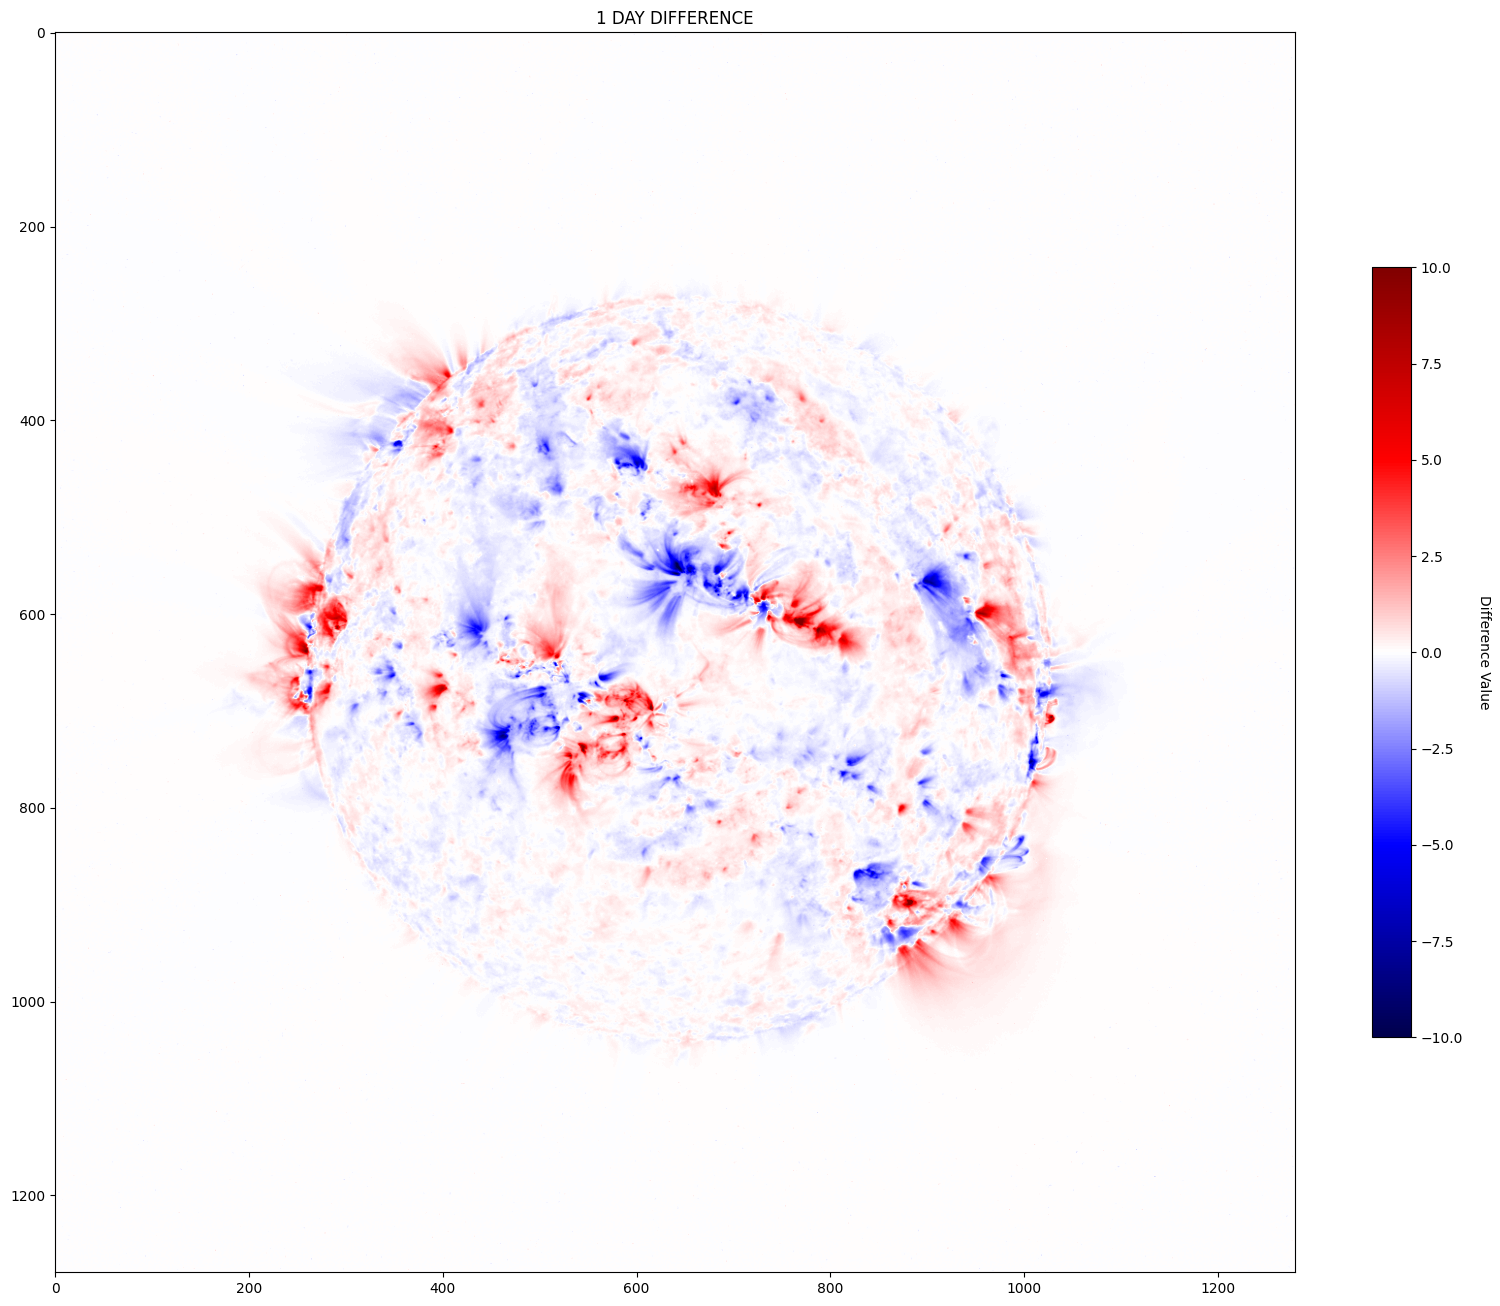

In [ ]:
plt.figure(figsize=(20,20))
im = plt.imshow(data1d-data0, cmap='seismic', vmin=-10, vmax=10)
plt.title("1 DAY DIFFERENCE")
cbar = plt.colorbar(im, shrink=0.5)
cbar.set_label('Difference Value', rotation=270, labelpad=20)

## All of the changes

Lets now create a plot with all of them together!

Minor changes in the code!

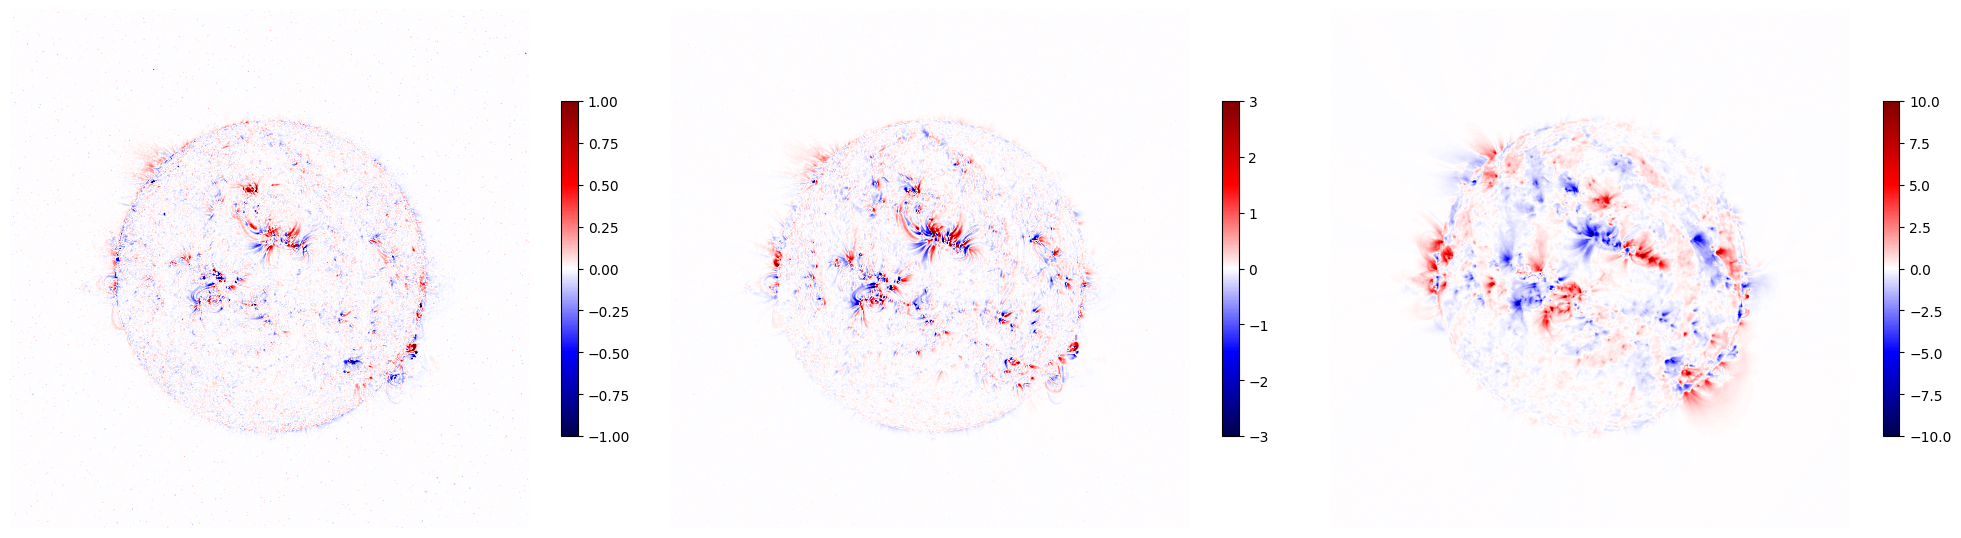

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 7))

# First plot
im = axs[0].imshow(data12m-data0, cmap='seismic', vmin=-1, vmax=1)
cbar = fig.colorbar(im, ax=axs[0], shrink=0.5)
axs[0].axis('off')  # Turn off the axis

# Second plot
im = axs[1].imshow(data1h-data0, cmap='seismic', vmin=-3, vmax=3)
cbar = fig.colorbar(im, ax=axs[1], shrink=0.5)
axs[1].axis('off')  # Turn off the axis

# Third plot
im = axs[2].imshow(data1d-data0, cmap='seismic', vmin=-10, vmax=10)
cbar = fig.colorbar(im, ax=axs[2], shrink=0.5)
axs[2].axis('off')  # Turn off the axis

plt.tight_layout()
plt.show()



**Pro Tip**: Look in the metadata for the units of the RAD values. What are the units of these plots?